# Gordetako soluzioen azterketa eta erdiguneko metodo inplizituaren eraginkortasuna

<ul id="top">
<li><a href="#Pakete-eta-funtzioak-kargatu"> 
    Pakete eta funtzioak kargatu</a></li>
<li><a href="#Gordetako-soluzio-periodikoak-irakurri">
    Gordetako soluzio periodikoak irakurri</a></li>
<li><a href="#Une-kolinealak-aztertu">
    Une kolinealak aztertu</a></li>
<li><a href="#Fast-Fourier-Transform">
    Fast Fourier Transform</a></li>
<li><a href="#Gordetako-soluzio-periodiko-zaharrak-irakurri-(3-fasetan-antolatutako-bilaketa)">
    Gordetako soluzio periodiko zaharrak irakurri (3 fasetan antolatutako bilaketa)</a></li>
<li><a href="#Erdiguneko-Metodo-Inplizituan-estrapolazioaren-eraginkortasuna-aztertu">
    Erdiguneko Metodo Inplizituan estrapolazioaren eraginkortasuna aztertu</a></li> 
</ul>  

## Pakete eta funtzioak kargatu

In [1]:
using LinearAlgebra
using Plots 
using Optim
using BenchmarkTools
using Combinatorics
using CSV
using DataFrames
using ForwardDiff
using FFTW

In [12]:
include("./src/EMI.jl"); include("./src/TBP.jl"); include("./src/utils.jl"); include("./src/Loss.jl");

## Gordetako soluzio periodikoak irakurri

In [3]:
#filepath = "./results/TBP_automatizatuta.csv"
#filepath = "./results/TBP_automatizatuta_filtered.csv"
filepath = "./results/TBP_automatizatuta_filtered_filtered.csv"

"./results/TBP_automatizatuta_filtered_filtered.csv"

In [4]:
z0_list, Zopt_list, n_list, sigma_list = CSVIrakurri(filepath);
i = 0;

In [101]:
i=15
println("i = ", i)
T = Zopt_list[i][5]
n = n_list[i]
dtau = T/n
F3 = FLoss3(sigma_list[i], n)
println("h: ", Zopt_list[i][6])
println("T: ", T)
println("dtau: ", dtau)
println("z0: ", z0_list[i])
println("Zopt: ", Zopt_list[i])
println("Helburu funtzioa: ", F3(Zopt_list[i]));

i = 15
h: -0.49091997000051335
T: 14.808201926364468
dtau: 0.003920625344549767
z0: [2.010962565466982, 2.529259322710767, 2.97557474886717, 2.348971926725864]
Zopt: [2.327272484942429, 3.1397189212931855, 1.3434129739636649, 2.650533764807641, 14.808201926364468, -0.49091997000051335]
Helburu funtzioa: 2.0686299517610593e-26


Periodoa: 44.424605779093405


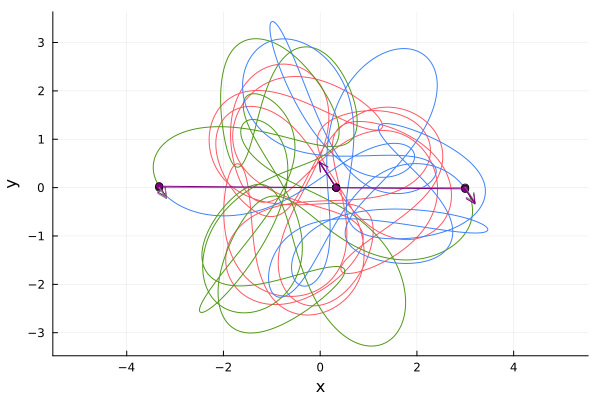

Kodea_middle: 321312312312312132132132131231231
Kodea_far: 233233233223223223223323323323322


In [103]:
periodoa = 3T
println("Periodoa: ", periodoa)
tt, UU, uu = Irudikatu(Zopt_list[i], 0., periodoa, dtau, Zopt_list[i][6]);
#Kodea lortzeko urratsak
g_col_list = [g_col(u) for u in uu] 
code_middle, code_far, ind_kolinear_list = getCode(UU, g_col_list)
println("Kodea_middle: ", join(code_middle,""))
println("Kodea_far: ", join(code_far,""))

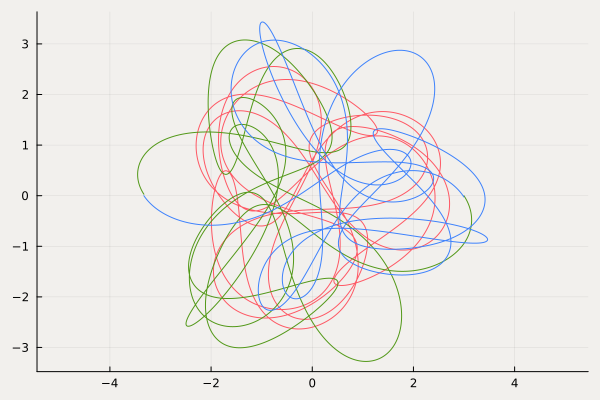

"C:\\Users\\Lorea\\Downloads\\OneDrive_1_15-6-2025\\AAA\\AAA\\Figures\\Sol_per_15.svg"

In [104]:
pl = Irudikatu(Zopt_list[i], 0.,3T, dtau, Zopt_list[i][6], triangeluak = false)
display(pl)
savefig(pl, "./Figures/Sol_per_$(i).svg")

## Une kolinealak aztertu

In [294]:
j = 0;

In [160]:
j+=1
Irudikatu(Zopt_list[i], 0., tt[ind_kolinear_list[j]], dtau, Zopt_list[i][6]); 


LoadError: BoundsError: attempt to access 14-element Vector{Int64} at index [15]

## Fast Fourier Transform

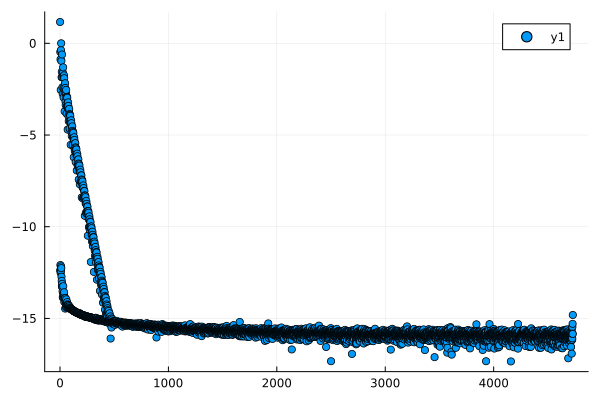

In [276]:
II = I_fcn.(UU[1:end-1])
hII = rfft(II)/length(II)
loghII = log10.(abs.(hII))
scatter(loghII)

### Egoera bat irudikatu eta gordetzeko kodea

### Ibilbidea irudikatu eta gordetzeko kodea

## Gordetako soluzio periodiko zaharrak irakurri (3 fasetan antolatutako bilaketa)

In [ ]:
filepath = "./results/older/TBP_periodikoak.csv"
list1, list2, list3, list4 = csvIrakurri(filepath);
k = 0;

In [ ]:
i-=1
k = kk[i]
println("k = ", k)
z0 = list4[k]
println("z0: ", z0)
F2 = FLoss2(list3[k][1], list3[k][2], list3[k][3])
println("F2: ", F2(list2[k]))
println(list3[k][1])

In [ ]:
#F2 emaitza Newton
tt, UU, uu = Irudikatu(list2[k], 0., 2list2[k][5], list2[k][5]/list3[k][2], list3[k][3]);
g_col_list = [g_col(u) for u in uu]
code_middle, code_far, ind_kolinear_list, periodic = getCode(UU, g_col_list3, 500)
println("Kodea: ", code_far)

## Erdiguneko Metodo Inplizituan estrapolazioaren eraginkortasuna aztertu

In [296]:
iterazio_kopurua = 50

dtaus = [1/32,1/64, 1/128, 1/256, 1/512]

times32 = [Float64[] for i in 1:6]
iter32 = [Float64[] for i in 1:6]

times64 = [Float64[] for i in 1:6]
iter64 = [Float64[] for i in 1:6]

times128 = [Float64[] for i in 1:6]
iter128 = [Float64[] for i in 1:6]

times256 = [Float64[] for i in 1:6]
iter256 = [Float64[] for i in 1:6]

times512 = [Float64[] for i in 1:6]
iter512 = [Float64[] for i in 1:6]

times = [times32, times64, times128, times256, times512]
iter = [iter32, iter64, iter128, iter256, iter512]

extrakop = [0,2,4,6,8,10]

for k in 1:iterazio_kopurua
    #Ausazko hasierako egoera lortu
    z0 = pi*rand(4)
    u0 = HasierakoEgoera(z0)
    U0 = LCinvFcn(u0)
    h = ThreeBodyRelEnergy(u0)

    for i in 1:length(dtaus) #delta tau desberdinetarako
        for j in 1:6 #estrapolazio kopuru bakoitzeko
            if j==1 #estrapolaziorik ez
                elapsed_time = @elapsed begin
                    _, lag = EMIiter0(U0, 0.,20.,dtaus[i], [h])
                end
            else #estrapolazioarekin
                elapsed_time = @elapsed begin
                    _, lag = EMIiter(U0, 0.,20.,dtaus[i],[h], extrakop[j])
                end
            end
            push!(iter[i][j], lag)
            push!(times[i][j], elapsed_time)
        end
    end 
end

#Bistaratu emaitzak
for i in 1:5
    println("_________________________________________")
    println("dtau: ", dtaus[i])
    println("_________________________________________")
    for j in 1:6
        println("Nabla ordena: ", extrakop[j])
        println("Iterazio batezbestekoa: ", sum(iter[i][j])/length(iter[i][j]))
        println("Denbora batezbestekoa: ", sum(times[i][j])/length(times[i][j]))
    end
end

_________________________________________
dtau: 0.03125
_________________________________________
Nabla ordena: 0
Iterazio batezbestekoa: 11.593375000000002
Denbora batezbestekoa: 0.0015132036
Nabla ordena: 2
Iterazio batezbestekoa: 11.256375
Denbora batezbestekoa: 0.0015802561600000002
Nabla ordena: 4
Iterazio batezbestekoa: 10.18159375
Denbora batezbestekoa: 0.0015170648399999997
Nabla ordena: 6
Iterazio batezbestekoa: 9.43071875
Denbora batezbestekoa: 0.00148723252
Nabla ordena: 8
Iterazio batezbestekoa: 8.906749999999999
Denbora batezbestekoa: 0.0014829373200000002
Nabla ordena: 10
Iterazio batezbestekoa: 8.54584375
Denbora batezbestekoa: 0.0014879177400000001
_________________________________________
dtau: 0.015625
_________________________________________
Nabla ordena: 0
Iterazio batezbestekoa: 9.391890625
Denbora batezbestekoa: 0.00240346844
Nabla ordena: 2
Iterazio batezbestekoa: 8.80090625
Denbora batezbestekoa: 0.0025051873199999995
Nabla ordena: 4
Iterazio batezbestekoa: 7.5